Importing Required Libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading Dataset


In [3]:
df = pd.read_csv("USA_Housing.csv")

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
#Dropping Address Column
df=df.drop(['Address'],axis=1)


In [6]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: >

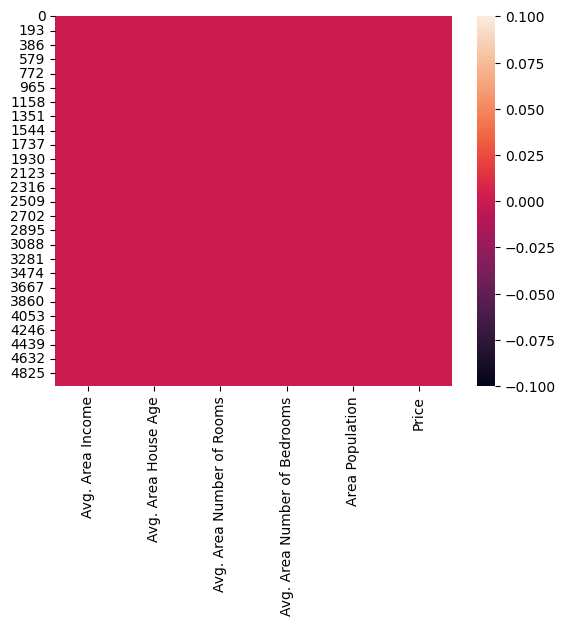

In [7]:
#Checking Null Values
sns.heatmap(df.isnull())

No Null Values are here

**Train Test Split**

In [8]:
X = df.drop('Price',axis=1)
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30)

In [9]:
#Training the Model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [10]:
#Predicting the Price
predictions = model.predict(X_test)

In [11]:
predictions

array([1801007.45029182, 1666394.00330006, 1523220.34288578, ...,
       1449406.39601142,  887572.31126096, 1450844.42445501],
      shape=(1500,))

**Evaluation**

In [12]:
error = np.sqrt(metrics.mean_absolute_error(Y_test,predictions))

In [13]:
error

np.float64(283.54966640399596)

In [14]:
import pickle

# Assuming your model is named 'lm' (commonly used for LinearRegression)
pickle.dump(model, open('house_price_model.pkl', 'wb'))


In [ ]:
model = pickle.load(open(model_path, 'rb'))
